In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings("ignore")

In [94]:
#loading the Mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print("Training Set Size:",x_train.shape,y_train.shape)
print("Testing Set Size:",x_test.shape,y_test.shape)


Training Set Size: (60000, 28, 28) (60000,)
Testing Set Size: (10000, 28, 28) (10000,)


In [95]:
#number of classes
num_labels=len(np.unique(y_train))
num_labels

10

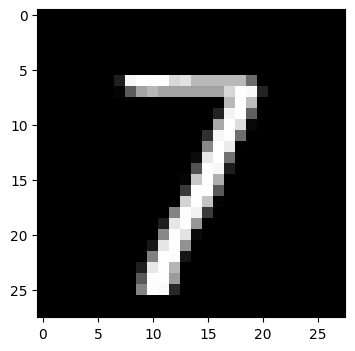

In [96]:
#Showing examples of dataset
plt.figure(figsize=(4,4))
plt.imshow(x_train[560],cmap="gray")

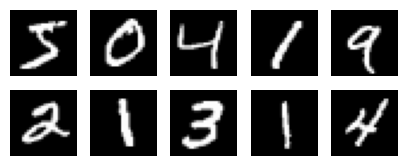

In [97]:
plt.figure(figsize=(5,5))
for i in range(0,10):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(x_train[i],cmap="gray")
    plt.axis("off")

In [98]:
def visualize_img(data,num=10):
    plt.figure(figsize=(5,5))
    for i in range(0,10):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(data[i],cmap="gray")
        plt.axis("off")

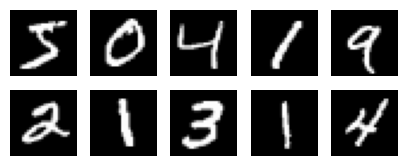

In [99]:
visualize_img(x_train,25)

In [100]:
#before encoding
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [101]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [102]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [103]:
image_size=x_train.shape[1]
image_size

28

In [104]:
print(f"x_train size:{x_train.shape}/n/nx_test size:{x_test.shape}")

x_train size:(60000, 28, 28)/n/nx_test size:(10000, 28, 28)


In [105]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [106]:
print(f"x_test size:{x_test.shape}/n/nx_test size:{x_test.shape}")

x_test size:(10000, 28, 28, 1)/n/nx_test size:(10000, 28, 28, 1)


In [107]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [108]:
  model=tf.keras.Sequential([
      Flatten(input_shape=(28,28,1)),
      Dense(units=128,activation="relu",name="layer1"),#Hidden Layer
      Dense(units=num_labels,activation="softmax",name="output_layer")])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])


In [109]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [110]:
# model fit
model.fit(x_train,y_train,epochs=8,batch_size=128,
          validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8350 - loss: 0.6083 - precision_2: 0.9357 - recall_2: 0.7069 - val_accuracy: 0.9452 - val_loss: 0.1902 - val_precision_2: 0.9592 - val_recall_2: 0.9334
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9514 - loss: 0.1746 - precision_2: 0.9635 - recall_2: 0.9405 - val_accuracy: 0.9577 - val_loss: 0.1442 - val_precision_2: 0.9668 - val_recall_2: 0.9497
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9664 - loss: 0.1197 - precision_2: 0.9739 - recall_2: 0.9590 - val_accuracy: 0.9655 - val_loss: 0.1147 - val_precision_2: 0.9722 - val_recall_2: 0.9603
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9739 - loss: 0.0918 - precision_2: 0.9799 - recall_2: 0.9686 - val_accuracy: 0.9709 - val_loss: 0.0949 - val_precision_2: 0.9758 - val_recall_2: 0.9672
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9794 - loss: 0.0727 - precision_2: 0.9843 - recall_2: 0.9753 - val_

In [111]:
history=model.fit(x_train,y_train,epochs=8,batch_size=128,
          validation_data=(x_test,y_test))

Epoch 1/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9908 - loss: 0.0342 - precision_2: 0.9927 - recall_2: 0.9894 - val_accuracy: 0.9761 - val_loss: 0.0759 - val_precision_2: 0.9787 - val_recall_2: 0.9750
Epoch 2/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9926 - loss: 0.0301 - precision_2: 0.9939 - recall_2: 0.9912 - val_accuracy: 0.9773 - val_loss: 0.0761 - val_precision_2: 0.9799 - val_recall_2: 0.9755
Epoch 3/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9937 - loss: 0.0251 - precision_2: 0.9950 - recall_2: 0.9925 - val_accuracy: 0.9775 - val_loss: 0.0731 - val_precision_2: 0.9799 - val_recall_2: 0.9763
Epoch 4/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9950 - loss: 0.0210 - precision_2: 0.9958 - recall_2: 0.9940 - val_accuracy: 0.9776 - val_loss: 0.0791 - val_precision_2: 0.9794 - val_recall_2: 0.9767
Epoch 5/8
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9959 - loss: 0.0181 - precision_2: 0.9965 - recall_2: 0.9950 - val_

Text(0.5, 1.0, 'Training and Test loss Graph')

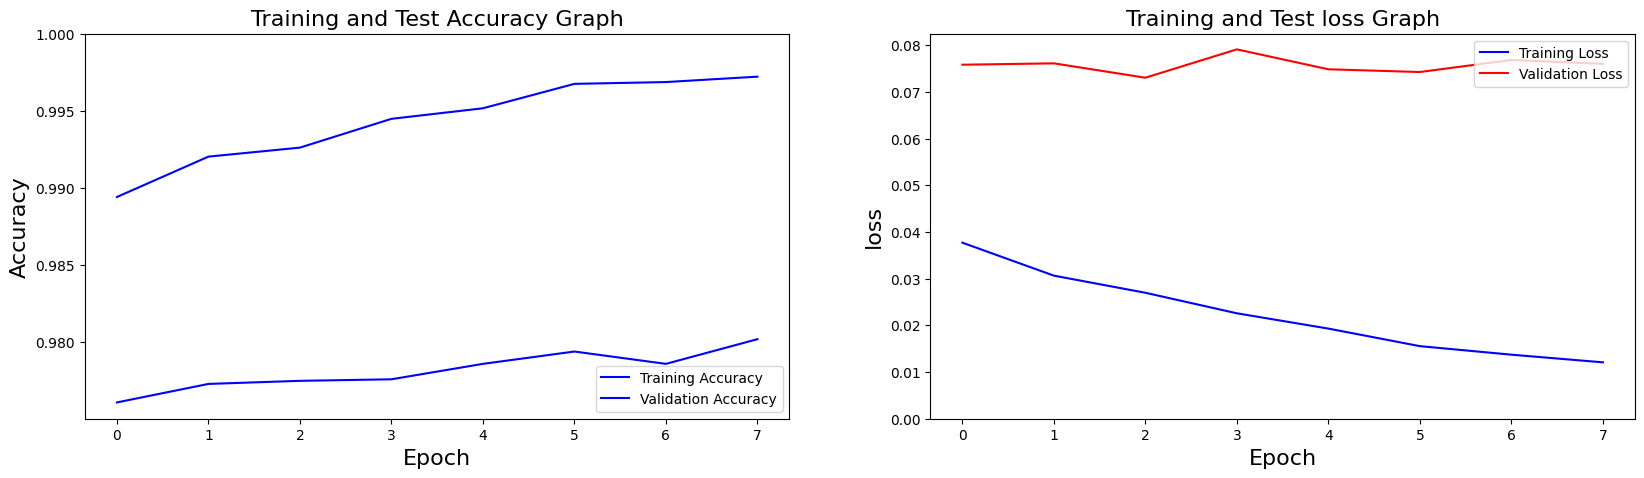

In [112]:
#Accuracy and loss charts
#accuracy
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],color="b",
         label="Training Accuracy")
plt.plot(history.history["val_accuracy"],color="b",
         label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Accuracy",fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Test Accuracy Graph",fontsize=16)
#loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color="b",label="Training Loss")
plt.plot(history.history["val_loss"],color="r",label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Test loss Graph",fontsize=16)



                  

In [113]:
loss,precision,recall,acc=model.evaluate(x_test,y_test,verbose=False)
print(f"Test Accuracy:{round(acc*100,2)}")
print(f"Test Loss:{round(loss*100,2)}")
print(f"Test Precision:{round(precision*100,2)}")
print(f"Test Recall:{round(recall*100,2)}")

Test Accuracy:98.02
Test Loss:7.6
Test Precision:98.16
Test Recall:97.89


In [114]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [115]:
y_pred_classes=np.argmax(y_pred,axis=1)

In [116]:
if len(y_test.shape)>1and y_test.shape[1]!=1:
    y_test=np.argmax(y_test,axis=1)

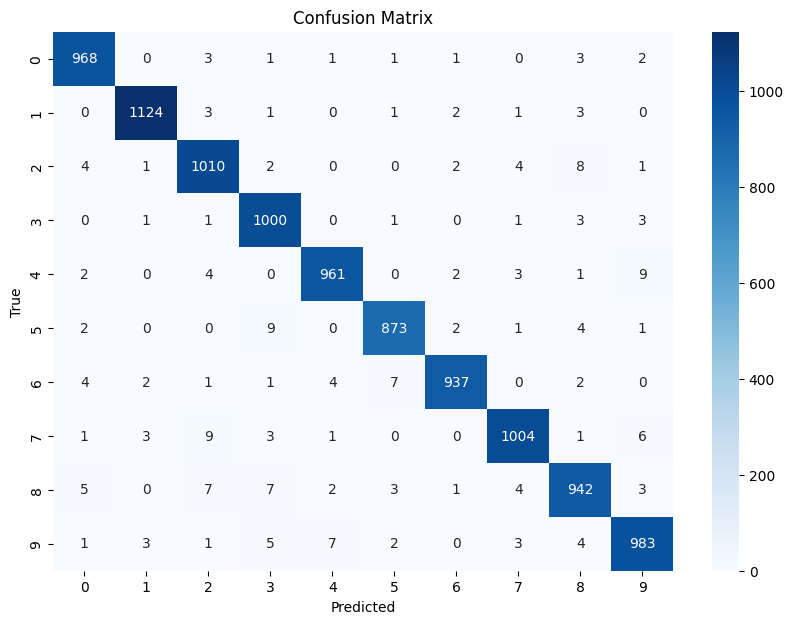

In [117]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [120]:
import random
random=random.randint(0,x_test.shape[0])
print(y_test[random])
test_image=x_test[random]
print(y_test[random])

9
9


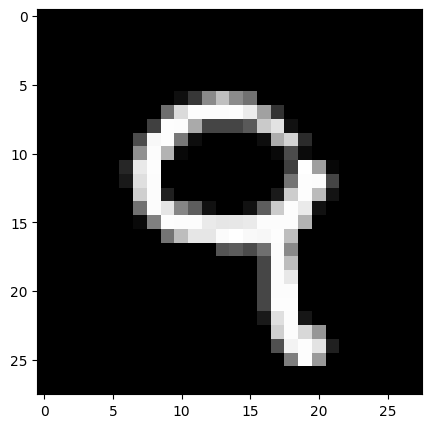

In [121]:
plt.figure(figsize=(5,5))
plt.imshow(test_image.reshape(28,28),cmap="gray")

In [ ]:
s